In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt

Create the z positions sequences. -2 um to 4 um gave good results in CNV7, MF3

In [3]:
zpos = np.arange(-2,5,0.2)

print(f'4 channels per z. {zpos.size} z positions. {zpos.size*4} frames.\n')

# 4 channels per position
for i in range(zpos.size):
    for _ in range(4):
        print(f'{zpos[i]:1.1f},',end='')
    print(' ',end='')

print('\n')

zpos = np.arange(-2,5,0.2)

print(f'3 channels per z. {zpos.size} z positions. {zpos.size*3} frames.\n')


# 3 channels per position
for i in range(zpos.size):
    for _ in range(3):
        print(f'{zpos[i]:1.1f},',end='')
    print(' ',end='')
    
print('\n')
    

4 channels per z. 35 z positions. 140 frames.

-2.0,-2.0,-2.0,-2.0, -1.8,-1.8,-1.8,-1.8, -1.6,-1.6,-1.6,-1.6, -1.4,-1.4,-1.4,-1.4, -1.2,-1.2,-1.2,-1.2, -1.0,-1.0,-1.0,-1.0, -0.8,-0.8,-0.8,-0.8, -0.6,-0.6,-0.6,-0.6, -0.4,-0.4,-0.4,-0.4, -0.2,-0.2,-0.2,-0.2, -0.0,-0.0,-0.0,-0.0, 0.2,0.2,0.2,0.2, 0.4,0.4,0.4,0.4, 0.6,0.6,0.6,0.6, 0.8,0.8,0.8,0.8, 1.0,1.0,1.0,1.0, 1.2,1.2,1.2,1.2, 1.4,1.4,1.4,1.4, 1.6,1.6,1.6,1.6, 1.8,1.8,1.8,1.8, 2.0,2.0,2.0,2.0, 2.2,2.2,2.2,2.2, 2.4,2.4,2.4,2.4, 2.6,2.6,2.6,2.6, 2.8,2.8,2.8,2.8, 3.0,3.0,3.0,3.0, 3.2,3.2,3.2,3.2, 3.4,3.4,3.4,3.4, 3.6,3.6,3.6,3.6, 3.8,3.8,3.8,3.8, 4.0,4.0,4.0,4.0, 4.2,4.2,4.2,4.2, 4.4,4.4,4.4,4.4, 4.6,4.6,4.6,4.6, 4.8,4.8,4.8,4.8, 

3 channels per z. 35 z positions. 105 frames.

-2.0,-2.0,-2.0, -1.8,-1.8,-1.8, -1.6,-1.6,-1.6, -1.4,-1.4,-1.4, -1.2,-1.2,-1.2, -1.0,-1.0,-1.0, -0.8,-0.8,-0.8, -0.6,-0.6,-0.6, -0.4,-0.4,-0.4, -0.2,-0.2,-0.2, -0.0,-0.0,-0.0, 0.2,0.2,0.2, 0.4,0.4,0.4, 0.6,0.6,0.6, 0.8,0.8,0.8, 1.0,1.0,1.0, 1.2,1.2,1.2, 1.4,1.4,1.4

It seems that I need to give the explicit shutter sequence for mf3. Why? there are enough differernces with mf8?

In [4]:
zpos = np.arange(-2,5,0.2)
counter = 0
channel = [0,1,2,4]

for i in range(zpos.size):
    print(f'\n<!-- 748, 637, 546, 405, {zpos[i]:1.1f} um-->')
    for j in range(4):
        counter+=1
        print(f'  <event>')
        print(f'    <channel>{channel[j]}</channel>')
        print(f'    <power>1</power>')
        print(f'    <on>{counter-1:1.0f}</on>')
        print(f'    <off>{counter:1.0f}</off>')
        print(f'    <color>255,255,255</color>') 
        print(f'  </event>')


<!-- 748, 637, 546, 405, -2.0 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>0</on>
    <off>1</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>1</on>
    <off>2</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>2</channel>
    <power>1</power>
    <on>2</on>
    <off>3</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>4</channel>
    <power>1</power>
    <on>3</on>
    <off>4</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 546, 405, -1.8 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>4</on>
    <off>5</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>5</on>
    <off>6</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>2</channel>
    <power>1</power>
    <on>6</on>
    <off>7</off>
    <color>255,255,255</color>
  </event>
  <event>
    <c

In [5]:
zpos = np.arange(-2,5,0.2)
counter = 0
channel = [0,1,2]
for i in range(zpos.size):
    print(f'\n<!-- 748, 637, 546, {zpos[i]:1.1f} um-->')
    for j in range(3):
        counter+=1
        print(f'  <event>')
        print(f'    <channel>{channel[j]}</channel>')
        print(f'    <power>1</power>')
        print(f'    <on>{counter-1:1.0f}</on>')
        print(f'    <off>{counter:1.0f}</off>')
        print(f'    <color>255,255,255</color>') 
        print(f'  </event>')


<!-- 748, 637, 546, -2.0 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>0</on>
    <off>1</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>1</on>
    <off>2</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>2</channel>
    <power>1</power>
    <on>2</on>
    <off>3</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 546, -1.8 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>3</on>
    <off>4</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>1</channel>
    <power>1</power>
    <on>4</on>
    <off>5</off>
    <color>255,255,255</color>
  </event>
  <event>
    <channel>2</channel>
    <power>1</power>
    <on>5</on>
    <off>6</off>
    <color>255,255,255</color>
  </event>

<!-- 748, 637, 546, -1.6 um-->
  <event>
    <channel>0</channel>
    <power>1</power>
    <on>6</on>
    <off>7</off>
    <color>255,255,255</color>
  </e

get positions

In [6]:
notebookFolder = 'c:/Users/Leonardo/Dropbox/research/analysis/CNVs/notebook/210526_CNV009_DNA_FISH/'
positionsFolder = 'c:/Software/merfish-parameters/positions/'
imagingSettingsFolder = 'c:/Software/imaging-settings/210526_CNV009/' 
experimentName = 'CNV009'
nrows = 10  # even number 
ncols = 12 # any number
dxy = 250 # separation between fov center (in microns)

X = []
Y = []

Xcoor = np.arange(-int(ncols/2),int(ncols/2),1)
Ycoor = np.arange(-int(nrows/2),int(nrows/2),1)

for i in Ycoor:
    if np.mod(i,2):
        currentXcoor = Xcoor
    else:
        currentXcoor = np.flip(Xcoor)
        
    for j in currentXcoor:
        Y.append(i*dxy)
        X.append(j*dxy)
        
for i in np.flip(Ycoor):
    Y.append(i*dxy)
    X.append((min(Xcoor)-1)*dxy)
    
    
positions = pd.DataFrame({'X':X,'Y':Y})

# save intermediateddata to image settings folder
outputName = f'positions_{experimentName}_{nrows}x{ncols+1}.txt'

for sample in range(2):
    outputPath = f'{imagingSettingsFolder}sample_0{sample+1}/{outputName}'
    np.savetxt(outputPath, positions, delimiter=',')
    print(f'{positions.shape[0]} positions saved to {outputPath}!')

    # save to positions folder
    outputPath = f'{positionsFolder}{outputName}'
    np.savetxt(outputPath, positions, delimiter=',')
    print(f'{positions.shape[0]} positions saved to {outputPath}!')

130 positions saved to c:/Software/imaging-settings/210526_CNV009/sample_01/positions_CNV009_10x13.txt!
130 positions saved to c:/Software/merfish-parameters/positions/positions_CNV009_10x13.txt!
130 positions saved to c:/Software/imaging-settings/210526_CNV009/sample_02/positions_CNV009_10x13.txt!
130 positions saved to c:/Software/merfish-parameters/positions/positions_CNV009_10x13.txt!


<IPython.core.display.Javascript object>


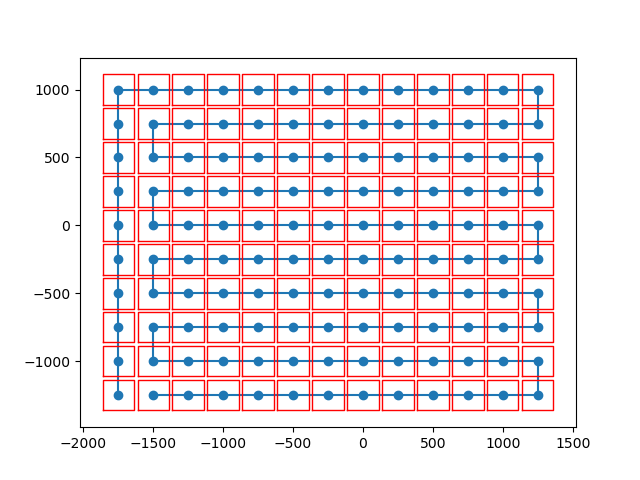

In [10]:
fig = plt.subplots()
plt.plot(X,Y,'o-')


fovPixels = 2048
micronPerPixel = 0.109
fovWidth = fovPixels*micronPerPixel
for i in range(len(X)):
    plt.plot([X[i]-fovWidth/2, X[i]+fovWidth/2, X[i]+fovWidth/2, X[i]-fovWidth/2, X[i]-fovWidth/2],
         [Y[i]-fovWidth/2, Y[i]-fovWidth/2, Y[i]+fovWidth/2, Y[i]+fovWidth/2, Y[i]-fovWidth/2], 'r-',lw=1)
    
    
# plt.axis('equal')
 

In [8]:
X

[-1500,
 -1250,
 -1000,
 -750,
 -500,
 -250,
 0,
 250,
 500,
 750,
 1000,
 1250,
 1250,
 1000,
 750,
 500,
 250,
 0,
 -250,
 -500,
 -750,
 -1000,
 -1250,
 -1500,
 -1500,
 -1250,
 -1000,
 -750,
 -500,
 -250,
 0,
 250,
 500,
 750,
 1000,
 1250,
 1250,
 1000,
 750,
 500,
 250,
 0,
 -250,
 -500,
 -750,
 -1000,
 -1250,
 -1500,
 -1500,
 -1250,
 -1000,
 -750,
 -500,
 -250,
 0,
 250,
 500,
 750,
 1000,
 1250,
 1250,
 1000,
 750,
 500,
 250,
 0,
 -250,
 -500,
 -750,
 -1000,
 -1250,
 -1500,
 -1500,
 -1250,
 -1000,
 -750,
 -500,
 -250,
 0,
 250,
 500,
 750,
 1000,
 1250,
 1250,
 1000,
 750,
 500,
 250,
 0,
 -250,
 -500,
 -750,
 -1000,
 -1250,
 -1500,
 -1500,
 -1250,
 -1000,
 -750,
 -500,
 -250,
 0,
 250,
 500,
 750,
 1000,
 1250,
 1250,
 1000,
 750,
 500,
 250,
 0,
 -250,
 -500,
 -750,
 -1000,
 -1250,
 -1500,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750,
 -1750]